# 3 a) : Investigate the performance of a number of machine learning procedures on this dataset.
    
### Introduction

The objective of this notebook is to find the amount of insurance claimed by a particular individial. We will use Regression Techniques to get the intended results.

### Observations

We can see that the data contains both Categorical and Numeric features. The given data doesn't contain any missing values.

#### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Load DataSet

In [2]:
# making data frame from csv file
data = pd.read_csv("D:\\Machine Learning\CE802_P3_Data\CE802_P3_Data.csv")
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,High,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,Very low,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,Low,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,Low,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,Very low,-14434.13,-9.45,-46.14,1435.90,373.56


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   object 
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   int64  
 9   F10     1500 non-null   int64  
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   object 
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


In [4]:
#There are 4 distinct categories.
data['F4'].value_counts()

Rest      407
UK        380
USA       360
Europe    353
Name: F4, dtype: int64

In [5]:
#There are 5 distinct values.
data['F12'].value_counts()

Very low     312
Low          310
High         301
Very high    290
Medium       287
Name: F12, dtype: int64

In [6]:
#Using the get_dummies function to transform the categorical values to numeric.

data=pd.get_dummies(data, columns=["F4", "F12"],drop_first=True)

In [7]:
data['TARGET']=data['Target']

In [8]:
del data['Target']

In [9]:
data.head()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,...,F15,F16,F4_Rest,F4_UK,F4_USA,F12_Low,F12_Medium,F12_Very high,F12_Very low,TARGET
0,16.56,12.42,-236.06,-98.88,529.56,4.54,379.54,1,1,7.30,...,-39.42,1734.58,1,0,0,0,0,0,0,3616.82
1,11.72,12.46,-190.06,-59.22,493.11,0.05,402.78,5,3,-1.28,...,-35.61,1672.70,1,0,0,0,0,0,1,3342.88
2,4.34,2.74,-201.20,-228.48,563.79,1.22,147.35,4,4,8.28,...,-29.10,1462.86,0,1,0,1,0,0,0,0.00
3,12.76,2.58,-282.26,-173.28,536.94,0.25,113.49,4,3,6.26,...,-34.59,809.46,0,1,0,1,0,0,0,1742.65
4,11.10,9.82,-242.86,-193.14,617.52,9.15,343.64,8,6,-6.88,...,-46.14,1435.90,0,0,1,0,0,0,1,373.56


#### Create X and Y Metrics

In [10]:
x=data.drop(['TARGET'],axis='columns')
y=data['TARGET']

#### Data Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [ ]:
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

X_train=StandardScaler(with_mean=False).fit_transform(X_train)
X_train.shape

In [ ]:
X_test=StandardScaler(with_mean=False).fit_transform(X_test)
X_test.shape

#### Data Dimention

In [14]:
X_train.shape, y_train.shape

((1200, 21), (1200,))

In [15]:
X_test.shape, y_test.shape

((300, 21), (300,))

# Linear Regression Model

In [16]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

##### Instantiate Linear Model Regresser

In [17]:
model=linear_model.LinearRegression()

##### Fit the Linear model to the training data

In [18]:
model.fit(X_train,y_train)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


##### Do prediction using our test data

In [19]:
y_pred=model.predict(X_test)

In [20]:
#The coefficient of R-Square
model.score(X_train,y_train)

0.794089868408217

#### Calculate the performance of Linear Model

In [21]:
print("Coefficients:", model.coef_)
print("Intercept:",model.intercept_)
print('Mean Absolute Error (MAE) : %.2f'% mean_absolute_error(y_test,y_pred))
print('Mean Squared Error (MSE) : %.2f'%  mean_squared_error(y_test,y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination : %.2f'%  r2_score(y_test,y_pred))

print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficients: [ 365.21917218  379.63339477   -9.97560189  433.78525045   -5.33897195
    5.11937939 -301.04004907  231.33009079 -240.30470326   10.42838007
  -13.96622022  -15.23265128   -0.54807772 -258.6889933   249.59482974
   72.84002241 -151.61681293 -129.07394936  -66.28226809   66.16697111
 -177.06567141]
Intercept: 1736.6527021684274
Mean Absolute Error (MAE) : 409.61
Mean Squared Error (MSE) : 270126.09
Coefficient of determination : 0.78
Root Mean Squared Error: 519.7365558701076


In [22]:
y_test

471     1753.12
9       1088.68
1499       0.00
54       456.27
1411     599.04
         ...   
220       94.21
946        0.00
992      789.66
1496    1528.48
443     1230.70
Name: TARGET, Length: 300, dtype: float64

In [23]:
y_pred

array([ 1491.33845227,  1603.99055361,  -194.3795622 ,   653.15340717,
        1267.11256251,  -938.91407561,   739.88886098, -1799.2179285 ,
        1702.41256441,   -61.79158689,   766.69975096,   168.19195528,
        1136.98879651,  1742.25347654,  2801.23116914,   978.59747836,
         298.56411243,   403.47858899,   -55.97047371,  -124.71849813,
        1002.3067824 ,  2873.94613199,  1149.94568614,  -232.88709314,
        1384.58311758,  1158.98933818,  1375.91567001,   552.37929544,
         508.68056829,  1100.12072659,  1023.29218989,   115.21899999,
        2471.18976625,  1124.72686115,   -32.61674049,   593.46516726,
        1251.13124735,  3230.00022198,   258.99093514, -1341.98415334,
        1700.41932333,  1772.29038555,   734.5902719 ,  1846.54821892,
       -1107.23991275,  1962.17165485, -1007.85695809,  -149.34189196,
        1200.60489286,  1744.82333661,  1081.34578521,   517.96666696,
        1585.12181767,    38.88887507,  1787.32626065,   693.06357448,
      

#### Scatter Plot

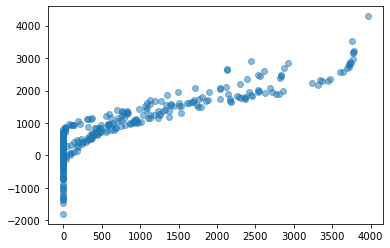

In [24]:
plt.scatter(y_test, y_pred, alpha=0.5)    
plt.show()   

# Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

###### Instantiate Decision Tree Regresser

In [26]:
dtr = DecisionTreeRegressor(splitter='best',min_samples_split=28,max_depth=6,criterion='friedman_mse')

##### Fit the Decision Tree to the training data

In [27]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=6,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=28,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [28]:
#The R^2 Score
dtr.score(X_train,y_train)

0.6700264276881002

##### Do prediction using our test data

In [29]:
y_pred_dtr = dtr.predict(X_test)

##### Import Regression Metrics

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

##### Calculate the performance of Regression Model

In [31]:
print("Mean Absolute Error (MAE):",mean_absolute_error(y_test, y_pred_dtr))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_dtr))
print("Coefficient of determination (R^2):", r2_score(y_test, y_pred_dtr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_dtr)))

Mean Absolute Error (MAE): 581.9255631321874
Mean Squared Error (MSE): 642478.8460383507
Coefficient of determination (R^2): 0.4697365332340846
Root Mean Squared Error: 801.5477815067238


##### Plot the data

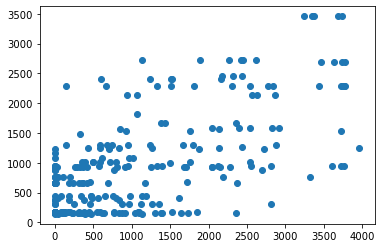

In [32]:
plt.scatter(y_test, y_pred_dtr) 
plt.show()

# Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

##### Instantiate Random Forest Regresser

In [34]:
regressor = RandomForestRegressor(n_estimators=40, min_samples_split= 10, max_features= 'auto', max_depth= 5, criterion= 'mse')

##### Fit the Random Forest to the training data

In [35]:
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
regressor.score(X_train,y_train)

0.7359764266960418

##### Do prediction using our test data

In [37]:
y_pred_r = regressor.predict(X_test)

##### Import Regression Metrics

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

##### Calculate the performance of Regression Model

In [39]:
print('Mean Absolute Error (MAE): %.2f'% mean_absolute_error(y_test,y_pred_r))
print('Mean Squared Error (MSE): %.2f'% mean_squared_error(y_test,y_pred_r))
print('Coefficient of determination (R^2): %.2f'% r2_score(y_test,y_pred_r))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_r)))

Mean Absolute Error (MAE): 546.71
Mean Squared Error (MSE): 491179.15
Coefficient of determination (R^2): 0.59
Root Mean Squared Error: 700.8417458372437


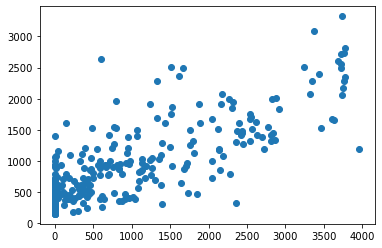

In [40]:
plt.scatter(y_test, y_pred_r) 
plt.show()

In [41]:
from tabulate import tabulate 

values = {'Algorithm':['Linear Regression Model', 'Decision Tree Regressor', 'Random Forest Regressor'], 
        'R^2':['0.794089868408217','0.6700264276881002' ,'0.7359764266960418'], 
        'MSE':['270126.09', '642478.8460383507', '491179.15'],
       } 

df = pd.DataFrame(values) 
  
# displaying the DataFrame 
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

+----+-------------------------+----------+--------+
|    | Algorithm               |      R^2 |    MSE |
|----+-------------------------+----------+--------|
|  0 | Linear Regression Model | 0.79409  | 270126 |
|  1 | Decision Tree Regressor | 0.670026 | 642479 |
|  2 | Random Forest Regressor | 0.735976 | 491179 |
+----+-------------------------+----------+--------+
